B 2

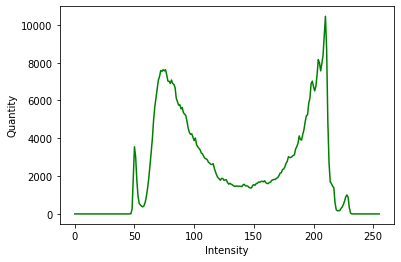

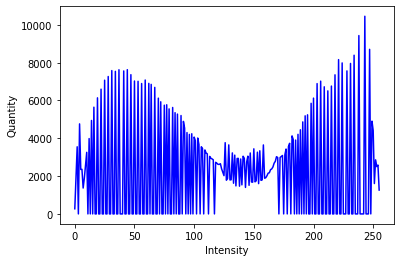

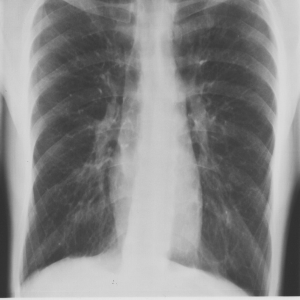

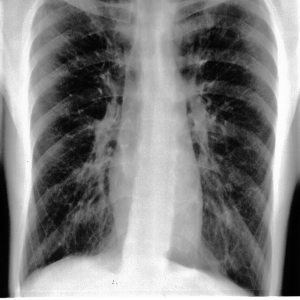

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

image_arr = cv2.imread('xray.jpg', cv2.IMREAD_GRAYSCALE)

height = image_arr.shape[0]
width = image_arr.shape[1]
intensity_count = np.zeros(256)

for i in range(height):
  for j in range(width):
    intensity_count[image_arr[i][j]]+=1

#plotting
plt.plot(intensity_count,'g',label='Lung')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.show()

intensity_count_eq = np.zeros(256)
eq_img= cv2.equalizeHist(image_arr)

for i in range(height):
  for j in range(width):
    intensity_count_eq [eq_img[i][j]]+=1

#plotting
plt.plot(intensity_count_eq,'b',label='Lung')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.show()



#histogram equalization
image_arr=cv2.resize(image_arr,(300,300))
eq_img=cv2.resize(eq_img,(300,300))

cv2_imshow( image_arr)
cv2_imshow(eq_img)


C2

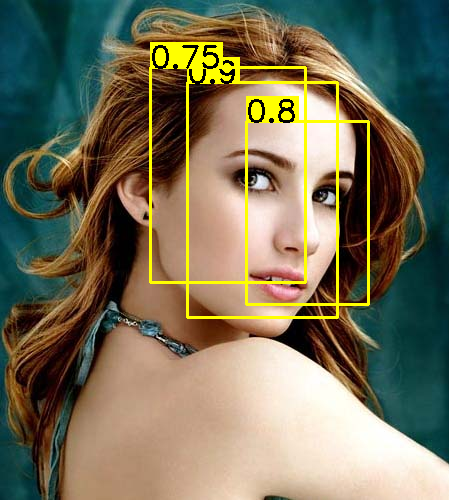

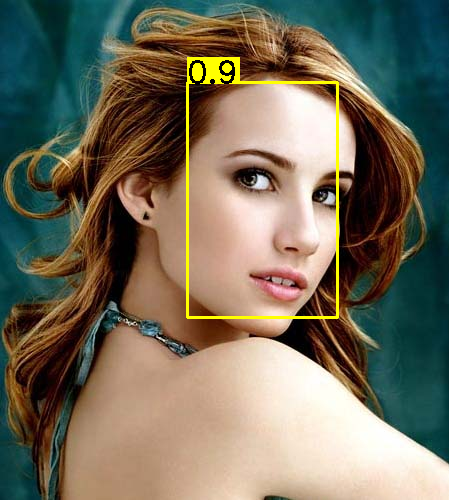

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

"""
    Non-max Suppression Algorithm
    @param list  Object candidate bounding boxes
    @param list  Confidence score of bounding boxes
    @param float IoU threshold
    @return Rest boxes after nms operation
"""
def nms(bounding_boxes, confidence_score, threshold):
    # If no bounding boxes, return empty list
    if len(bounding_boxes) == 0:
        return [], []

    # Bounding boxes
    boxes = np.array(bounding_boxes)

    # coordinates of bounding boxes
    start_x = boxes[:, 0]
    start_y = boxes[:, 1]
    end_x = boxes[:, 2]
    end_y = boxes[:, 3]

    # Confidence scores of bounding boxes
    score = np.array(confidence_score)

    # Picked bounding boxes
    picked_boxes = []
    picked_score = []

    # Compute areas of bounding boxes
    areas = (end_x - start_x + 1) * (end_y - start_y + 1)

    # Sort by confidence score of bounding boxes
    order = np.argsort(score)

    # Iterate bounding boxes
    while order.size > 0:
        # The index of largest confidence score
        index = order[-1]

        # Pick the bounding box with largest confidence score
        picked_boxes.append(bounding_boxes[index])
        picked_score.append(confidence_score[index])

        # Compute ordinates of intersection-over-union(IOU)
        x1 = np.maximum(start_x[index], start_x[order[:-1]])
        x2 = np.minimum(end_x[index], end_x[order[:-1]])
        y1 = np.maximum(start_y[index], start_y[order[:-1]])
        y2 = np.minimum(end_y[index], end_y[order[:-1]])

        # Compute areas of intersection-over-union
        w = np.maximum(0.0, x2 - x1 + 1)
        h = np.maximum(0.0, y2 - y1 + 1)
        intersection = w * h

        # Compute the ratio between intersection and union
        ratio = intersection / (areas[index] + areas[order[:-1]] - intersection)

        left = np.where(ratio < threshold)
        order = order[left]

    return picked_boxes, picked_score


# Image name
image_name = 'nms.jpg'

# Bounding boxes
bounding_boxes = [(187, 82, 337, 317), (150, 67, 305, 282), (246, 121, 368, 304)]
confidence_score = [0.9, 0.75, 0.8]

# Read image
image = cv2.imread(image_name)

# Copy image as original
org = image.copy()

# Draw parameters
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2

# IoU threshold
threshold = 0.4

# Draw bounding boxes and confidence score
for (start_x, start_y, end_x, end_y), confidence in zip(bounding_boxes, confidence_score):
    (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
    cv2.rectangle(org, (start_x, start_y - (2 * baseline + 5)), (start_x + w, start_y), (0, 255, 255), -1)
    cv2.rectangle(org, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
    cv2.putText(org, str(confidence), (start_x, start_y), font, font_scale, (0, 0, 0), thickness)

# Run non-max suppression algorithm
picked_boxes, picked_score = nms(bounding_boxes, confidence_score, threshold)

# Draw bounding boxes and confidence score after non-maximum supression
for (start_x, start_y, end_x, end_y), confidence in zip(picked_boxes, picked_score):
    (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
    cv2.rectangle(image, (start_x, start_y - (2 * baseline + 5)), (start_x + w, start_y), (0, 255, 255), -1)
    cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
    cv2.putText(image, str(confidence), (start_x, start_y), font, font_scale, (0, 0, 0), thickness)

# Show image
cv2_imshow(org)
cv2_imshow(image)
cv2.waitKey(0)

source https://github.com/amusi/Non-Maximum-Suppression/find/master

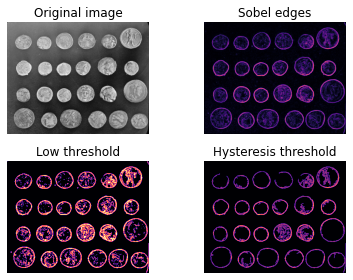

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters

fig, ax = plt.subplots(nrows=2, ncols=2)

image = data.coins()
edges = filters.sobel(image)

low = 0.1
high = 0.35

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

source : https://scikit-image.org/docs/dev/auto_examples/filters/plot_hysteresis.html#sphx-glr-download-auto-examples-filters-plot-hysteresis-py